In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
train_set = torchvision.datasets.MNIST(root = 'image_data/', train = True, download = True, transform = transforms.ToTensor())

/Users/roshnaey/opt/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
len(train_set)

60000

In [4]:
test_set = torchvision.datasets.MNIST(root = 'image_data/', train = False, download = True, transform = transforms.ToTensor())

In [5]:
len(test_set)

10000

In [6]:
img, lbl = train_set[0]
img.shape

torch.Size([1, 28, 28])

In [7]:
img

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

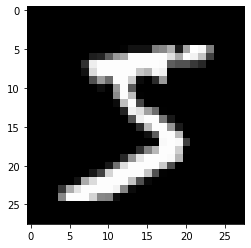

In [8]:
plt.imshow(img.view(28, 28), cmap = 'gray')

In [9]:
lbl

5

#### Batch Size

In [10]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size = 275, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size = 270)

In [11]:
tmp_data = iter(train_loader)
img_batch, lbl_batch = tmp_data.next()
img_batch.shape, lbl_batch.shape

(torch.Size([275, 1, 28, 28]), torch.Size([275]))

In [12]:
len(tmp_data)

219

#### Number of hidden layers

In [13]:
class FFNN(nn.Module):
    def __init__(self, _input_dim, _hidden_dim, _output_dim):
        super(FFNN, self).__init__()
        
        #self.layer_one = nn.Linear(_input_dim, _hidden_dim)
        #self.layer_two = nn.Linear(_hidden_dim, _output_dim)
        
        self.input_layer = nn.Linear(_input_dim, _hidden_dim[0])
        self.hid_layer_one = nn.Linear(_hidden_dim[0], _hidden_dim[1])
        self.hid_layer_two = nn.Linear(_hidden_dim[1], _hidden_dim[2])
        self.hid_layer_three = nn.Linear(_hidden_dim[2], _hidden_dim[3])
        self.hid_layer_four = nn.Linear(_hidden_dim[3], _hidden_dim[4])
        self.output_layer = nn.Linear(_hidden_dim[4], _output_dim)



        
    def forward(self, _x):
        #result = self.layer_one(_x)
        #result = F.relu(result)
        #result = self.layer_two(result)
        
        result = self.input_layer(_x)
        result = F.relu(result)
        
        result = self.hid_layer_one(result)
        result = F.relu(result)

        result = self.hid_layer_two(result)
        result = F.relu(result)

        result = self.hid_layer_three(result)
        result = F.relu(result)

        result = self.hid_layer_four(result)
        result = F.relu(result)


        result = self.output_layer(result)
        result = F.relu(result)        
        
        return result

#### Neurons in hidden layers and epochs

In [14]:
INP_DIM = img.shape[1] * img.shape[2]
HID_DIM = [10, 30, 80, 65, 40]
OUT_DIM = 10
EPOCHS = 14

In [15]:
ffnn_model = FFNN(INP_DIM, HID_DIM, OUT_DIM)
print(ffnn_model)

FFNN(
  (input_layer): Linear(in_features=784, out_features=10, bias=True)
  (hid_layer_one): Linear(in_features=10, out_features=30, bias=True)
  (hid_layer_two): Linear(in_features=30, out_features=80, bias=True)
  (hid_layer_three): Linear(in_features=80, out_features=65, bias=True)
  (hid_layer_four): Linear(in_features=65, out_features=40, bias=True)
  (output_layer): Linear(in_features=40, out_features=10, bias=True)
)


#### Learning rate

In [16]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(ffnn_model.parameters(), lr=0.00001)

In [17]:
for epoch in range(EPOCHS):
    print('Epoch: {}/{}'.format(epoch + 1, EPOCHS))
    batch_loss = []
    for idx, (image_batch, label_batch) in enumerate(train_loader):
        image_batch = image_batch.reshape(-1, INP_DIM)
        pred_labels = ffnn_model(image_batch)
        loss = loss_function(pred_labels, label_batch)
        batch_loss.append(loss.item())
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    print('average loss: {:.6f}'.format(sum(batch_loss)/len(batch_loss)))

Epoch: 1/14
average loss: 2.305199
Epoch: 2/14
average loss: 2.303327
Epoch: 3/14
average loss: 2.299941
Epoch: 4/14
average loss: 2.293969
Epoch: 5/14
average loss: 2.283969
Epoch: 6/14
average loss: 2.265394
Epoch: 7/14
average loss: 2.238851
Epoch: 8/14
average loss: 2.201427
Epoch: 9/14
average loss: 2.150038
Epoch: 10/14
average loss: 2.086569
Epoch: 11/14
average loss: 2.017292
Epoch: 12/14
average loss: 1.946643
Epoch: 13/14
average loss: 1.877584
Epoch: 14/14
average loss: 1.814559


#### Accuracy

In [18]:
with torch.no_grad():
    num_correct = 0
    num_images = 0
    for tst_img_batch, tst_lbl_batch in test_loader:
        tst_img_batch = tst_img_batch.reshape(-1, INP_DIM)
        result = ffnn_model(tst_img_batch)
        _, predictions = torch.max(result, dim= 1)
        num_images += tst_lbl_batch.shape[0]
        num_correct += torch.sum(predictions == tst_lbl_batch).item()
    accuracy = (num_correct/num_images) * 100.
    
print('accuracy: {} percent'.format(accuracy))

accuracy: 43.5 percent


# Global Optimization

from: https://docs.ray.io/en/latest/tune/index.html

In [20]:
from ray import tune
import tensorboard

In [22]:
def objective(step, alpha, beta):
    return (0.1 + alpha * step / 100)**(-1) + beta * 0.1


def training_function(config):
    # Hyperparameters
    alpha, beta = config["alpha"], config["beta"]
    for step in range(10):
        # Iterative training function - can be any arbitrary training procedure.
        intermediate_score = objective(step, alpha, beta)
        # Feed the score back back to Tune.
        tune.report(mean_loss=intermediate_score)


analysis = tune.run(
    training_function,
    config={
        "alpha": tune.grid_search([0.001, 0.01, 0.1]),
        "beta": tune.choice([1, 2, 3])
    })

print("Best config: ", analysis.get_best_config(
    metric="mean_loss", mode="min"))

# Get a dataframe for analyzing trial results.
df = analysis.results_df

Trial name,status,loc,alpha,beta
training_function_2ef85_00000,RUNNING,127.0.0.1:9606,0.001,3
training_function_2ef85_00001,PENDING,,0.01,1
training_function_2ef85_00002,PENDING,,0.1,2


Result for training_function_2ef85_00000:
  date: 2021-12-17_16-42-09
  done: false
  experiment_id: 4c569f032d734ffda4322e08a85e8967
  hostname: Roshnaeys-MBP.cfl.rr.com
  iterations_since_restore: 1
  mean_loss: 10.3
  neg_mean_loss: -10.3
  node_ip: 127.0.0.1
  pid: 9606
  time_since_restore: 0.0001399517059326172
  time_this_iter_s: 0.0001399517059326172
  time_total_s: 0.0001399517059326172
  timestamp: 1639777329
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2ef85_00000
  
Result for training_function_2ef85_00000:
  date: 2021-12-17_16-42-09
  done: true
  experiment_id: 4c569f032d734ffda4322e08a85e8967
  experiment_tag: 0_alpha=0.001,beta=3
  hostname: Roshnaeys-MBP.cfl.rr.com
  iterations_since_restore: 10
  mean_loss: 10.291008092716554
  neg_mean_loss: -10.291008092716554
  node_ip: 127.0.0.1
  pid: 9606
  time_since_restore: 0.07705187797546387
  time_this_iter_s: 0.005550861358642578
  time_total_s: 0.07705187797546387
  timestamp: 1639777329
  timesteps_

Trial name,status,loc,alpha,beta,loss,iter,total time (s),neg_mean_loss
training_function_2ef85_00000,TERMINATED,127.0.0.1:9606,0.001,3,10.291,10,0.0770519,-10.291
training_function_2ef85_00001,TERMINATED,127.0.0.1:9608,0.01,1,10.0108,10,0.165394,-10.0108
training_function_2ef85_00002,TERMINATED,127.0.0.1:9611,0.1,2,9.37431,10,0.178776,-9.37431


2021-12-17 16:42:10,904	INFO tune.py:626 -- Total run time: 2.90 seconds (2.73 seconds for the tuning loop).


Best config:  {'alpha': 0.1, 'beta': 2}


In [25]:
!pip install ray[tune]

In [24]:
import tensorflow as tf
import warnings

In [27]:
try:
    tf.get_logger().setLevel('INFO')
except Exception as exc:
    print(exc)
warnings.simplefilter("ignore")

In [29]:
import os
import numpy as np
import torch
import torch.optim as optim
from torchvision import datasets
from ray.tune.examples.mnist_pytorch import train, test, ConvNet, get_data_loaders

import ray
from ray import tune
from ray.tune import track
from ray.tune.schedulers import PopulationBasedTraining
from ray.tune.utils import validate_save_restore

%matplotlib inline
import matplotlib.style as style
import matplotlib.pyplot as plt
style.use("ggplot")

datasets.MNIST("~/data", train=True, download=True)

ImportError: cannot import name 'track' from 'ray' (/Users/roshnaey/opt/anaconda3/lib/python3.8/site-packages/ray/__init__.py)

I was unable to import and run the ray.tune track package in python. I tried running it in Colab in addition to on my local pc but it did not work. 
Jessica and I both ran into this issue and we tried multiple tutorials but we were not able to pull any packages from ray or tune. 